In [76]:
# Packages Part
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

from tqdm import tqdm

import xgboost as xgb

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [77]:
def rmse(y,y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [78]:
# Read data.csv which exist in root of the project
df = pd.read_csv('data.csv')

In [79]:
# Preview of the dataframe to check it healthy got loaded
df.head()

,Employee_number,Employee_name,Employee_age,Maritial_Status,Current_Salary,Number_of_Children,years_experience,past_projects,current_projects,Divorced_earlier,Father_alive,Mother_alive,performance_rating,Education_level,Department,Role,Job_Satisfaction,Work_Life_Balance,is_outlier
0,10001,Karen Anderson,36,True,116138,2,12,6,1,No,Yes,Yes,3,Bachelor's,R&D,Researcher,10.000000,1.936454,0
1,10002,David Taylor,34,False,82171,3,10,5,0,Yes,Yes,No,5,Diploma,HR,HR Executive,10.000000,4.077728,0
2,10003,Nina Kumar,36,False,48600,1,0,2,3,Yes,Yes,Yes,4,Diploma,Sales,Sales Manager,10.000000,3.975622,0
3,10004,John Patel,42,True,39675,1,2,4,2,Yes,Yes,Yes,3,Diploma,Engineering,Software Engineer,1.000000,3.790951,0
4,10005,Emily Sharma,27,True,161304,3,3,11,2,Yes,Yes,Yes,2,High School,R&D,Scientist,8.251833,10.000000,0


<h3>Analyze Data</h3>

In [80]:
df.dtypes

Employee_number         int64
Employee_name          object
Employee_age            int64
Maritial_Status          bool
Current_Salary          int64
Number_of_Children      int64
years_experience        int64
past_projects           int64
current_projects        int64
Divorced_earlier       object
Father_alive           object
Mother_alive           object
performance_rating      int64
Education_level        object
Department             object
Role                   object
Job_Satisfaction      float64
Work_Life_Balance     float64
is_outlier              int64
dtype: object

In [81]:
# Check null fraction in dataset
df.isnull().sum()

Employee_number       0
Employee_name         0
Employee_age          0
Maritial_Status       0
Current_Salary        0
Number_of_Children    0
years_experience      0
past_projects         0
current_projects      0
Divorced_earlier      0
Father_alive          0
Mother_alive          0
performance_rating    0
Education_level       0
Department            0
Role                  0
Job_Satisfaction      0
Work_Life_Balance     0
is_outlier            0
dtype: int64

<p>There isn't any null data in dataframe</p>

In [82]:
# The educational level of the employees
df.Education_level.value_counts()

Education_level
Bachelor's     22633
Diploma         9957
Master's        9016
High School     7435
PhD              959
Name: count, dtype: int64

In [83]:
# Number of employees in each department
df.Department.value_counts()

Department
Support        7244
Sales          7232
Finance        7148
Operations     7120
Engineering    7096
R&D            7083
HR             7077
Name: count, dtype: int64

In [84]:
# Number of the employee in each role
df.Role.value_counts()

Role
Customer Specialist       3628
Sales Manager             3625
Analyst                   3619
Support Engineer          3616
Account Executive         3607
Scientist                 3577
Ops Manager               3569
HR Manager                3556
Operations Coordinator    3551
Senior Analyst            3529
HR Executive              3521
Researcher                3506
ML Engineer               2432
Software Engineer         2367
DevOps Engineer           2297
Name: count, dtype: int64

In [85]:
# Look with a glance to the dataframe and extract some information
print ('maximum salary = %.i' % df.Current_Salary.max())
print ('minimum salary = %.i' % df.Current_Salary.min())
print ('average salary = %.i' % df.Current_Salary.mean())
print ('maximum age = %.i' % df.Employee_age.max())
print ('minimum age = %.i' % df.Employee_age.min())
print ('average age = %.i' % df.Employee_age.mean())
print ('maximum job satisfaction = %.i' % df.Job_Satisfaction.max())
print ('minimum job satisfaction = %.i' % df.Job_Satisfaction.min())
print ('average job satisfaction = %.i' % df.Job_Satisfaction.mean())

maximum salary = 695267
minimum salary = 15128
average salary = 58396
maximum age = 85
minimum age = 16
average age = 34
maximum job satisfaction = 10
minimum job satisfaction = 1
average job satisfaction = 6


<Axes: xlabel='Job_Satisfaction', ylabel='Count'>

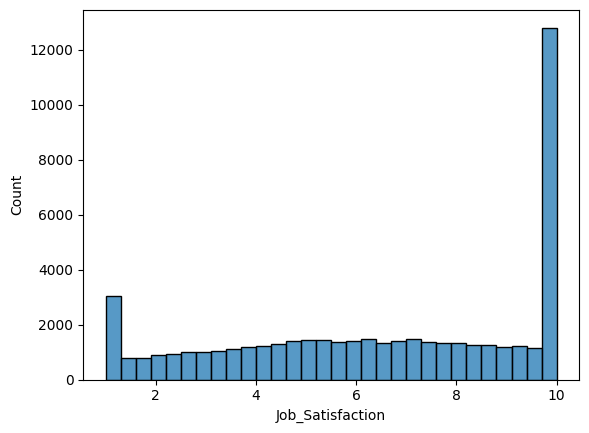

In [86]:
sns.histplot(df.Job_Satisfaction)

<h3>Data Prepration Part</h3>

In [87]:
# Turn all column names to lowercase
df.columns = df.columns.str.lower()

In [88]:
df.head()

,employee_number,employee_name,employee_age,maritial_status,current_salary,number_of_children,years_experience,past_projects,current_projects,divorced_earlier,father_alive,mother_alive,performance_rating,education_level,department,role,job_satisfaction,work_life_balance,is_outlier
0,10001,Karen Anderson,36,True,116138,2,12,6,1,No,Yes,Yes,3,Bachelor's,R&D,Researcher,10.000000,1.936454,0
1,10002,David Taylor,34,False,82171,3,10,5,0,Yes,Yes,No,5,Diploma,HR,HR Executive,10.000000,4.077728,0
2,10003,Nina Kumar,36,False,48600,1,0,2,3,Yes,Yes,Yes,4,Diploma,Sales,Sales Manager,10.000000,3.975622,0
3,10004,John Patel,42,True,39675,1,2,4,2,Yes,Yes,Yes,3,Diploma,Engineering,Software Engineer,1.000000,3.790951,0
4,10005,Emily Sharma,27,True,161304,3,3,11,2,Yes,Yes,Yes,2,High School,R&D,Scientist,8.251833,10.000000,0


In [89]:
# Turn all Yes/No columns to 0 and 1 for easier unerstanding
df.divorced_earlier = (df.divorced_earlier == 'Yes').astype(int)
df.father_alive = (df.father_alive == 'Yes').astype(int)
df.mother_alive = (df.mother_alive == 'Yes').astype(int)

In [90]:
# Trun marital status from boolean to 0 and 1
df.maritial_status = df.maritial_status.astype(int)

In [91]:
# Turn all Uppercase data to lowercase and without spaces
df['education_level'] = df['education_level'].str.lower().str.replace(' ','_')
df['department'] = df['department'].str.lower().str.replace(' ','_')
df['role'] = df['role'].str.lower().str.replace(' ','_')
df['employee_name'] = df['employee_name'].str.lower().str.replace(' ','_')

In [92]:
# Trun the satisfaction number to a number between 0 and 1 and round it to 2 to work with it as 'y' get easier(Percentage like)
df['job_satisfaction'] = (df['job_satisfaction'] / 10).round(2)
# Also I would turn the woek life bakance to a number like this to better working and analyze
df['work_life_balance'] = (df['work_life_balance'] / 10).round(2)

In [93]:
# To make sure chneges affected
df.head()

,employee_number,employee_name,employee_age,maritial_status,current_salary,number_of_children,years_experience,past_projects,current_projects,divorced_earlier,father_alive,mother_alive,performance_rating,education_level,department,role,job_satisfaction,work_life_balance,is_outlier
0,10001,karen_anderson,36,1,116138,2,12,6,1,0,1,1,3,bachelor's,r&d,researcher,1.00,0.19,0
1,10002,david_taylor,34,0,82171,3,10,5,0,1,1,0,5,diploma,hr,hr_executive,1.00,0.41,0
2,10003,nina_kumar,36,0,48600,1,0,2,3,1,1,1,4,diploma,sales,sales_manager,1.00,0.40,0
3,10004,john_patel,42,1,39675,1,2,4,2,1,1,1,3,diploma,engineering,software_engineer,0.10,0.38,0
4,10005,emily_sharma,27,1,161304,3,3,11,2,1,1,1,2,high_school,r&d,scientist,0.83,1.00,0


<h3>Data Spliting</h3>

In [94]:
# Spliting data into train, validation and test dataframes
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [95]:
# Reset the index of all part of the dataframe
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [96]:
# Add satisfaction column as 'y' for each dataframes
y_full_train = df_full_train.job_satisfaction
y_train = df_train.job_satisfaction
y_val = df_val.job_satisfaction
y_test = df_test.job_satisfaction

In [97]:
# Removing the satisfaction column from dataframe
del df_full_train['job_satisfaction']
del df_train['job_satisfaction']
del df_val['job_satisfaction']
del df_test['job_satisfaction']

In [98]:
df_train.head()

,employee_number,employee_name,employee_age,maritial_status,current_salary,number_of_children,years_experience,past_projects,current_projects,divorced_earlier,father_alive,mother_alive,performance_rating,education_level,department,role,work_life_balance,is_outlier
0,14608,sophia_anderson,37,1,67340,3,0,1,0,1,1,1,3,diploma,r&d,researcher,0.27,0
1,51939,aisha_singh,41,0,64777,1,14,2,3,1,1,1,3,high_school,support,customer_specialist,0.44,0
2,39250,rohit_singh,34,0,42512,0,0,13,1,0,1,1,5,master's,sales,account_executive,0.14,0
3,21202,leo_singh,25,1,48959,1,0,6,2,0,1,1,1,bachelor's,engineering,software_engineer,0.89,0
4,22583,linda_kumar,43,1,30000,0,19,8,1,1,1,1,5,diploma,finance,senior_analyst,0.61,0


<h3>Vectorising the data</h3>

In [99]:
# Turn all dataframes into the dictionaries
full_train_dicts = df_full_train.fillna(0).to_dict(orient='records')
train_dicts = df_train.fillna(0).to_dict(orient='records')
val_dicts = df_val.fillna(0).to_dict(orient='records')
test_dicts = df_test.fillna(0).to_dict(orient='records')

In [100]:
# Making the 'X' for our model with vectorising the datafarame dictionaries
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

<h3>Train model with random forest</h3>

<h4>Parameter tuning</h4>

In [25]:
# Trying different max_depths
scores = []
for d in [1, 2, 4, 5, 10, 50, 100]:
    for n in tqdm([50, 100, 150, 200], desc=f"max_depth={d}"):
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        result = rmse(y_val, y_pred)
        scores.append((d, n, result))

max_depth=100: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:07<00:00, 16.87s/it]


In [29]:
# Turning score into a dataframe
columns = ['max_depth', 'n_estimators', 'result']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,result
0,1,50,0.275890
1,1,100,0.275580
2,1,150,0.275532
3,1,200,0.275488
4,2,50,0.270724


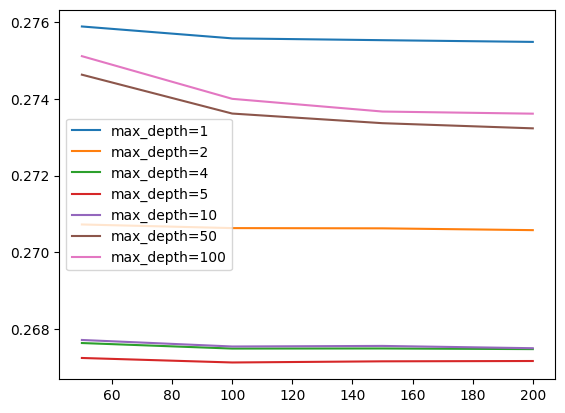

In [30]:
# Visuallayze the numbers for better understanding
for d in [1, 2, 4, 5, 10, 50, 100]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.result, label='max_depth=%d' %d)

plt.legend()

<p>Depend on the chart max_depth '5' is performe the best</p>

In [31]:
# Max_depth = 5 in n = 100 is looks great in the chart
max_depth = 5

In [32]:
# Finding the best min_samples_leaf value for our data
scores = []

for s in [40, 50, 60, 100, 20]:
    for n in tqdm([50, 100, 150, 200], desc=f"min_samples_leaf={s}"):
        rf = RandomForestRegressor(n_estimators=n, max_depth=max_depth, min_samples_leaf=s, random_state=1, n_jobs=-1)
        rf.fit(X_train,y_train)
        
        y_pred = rf.predict(X_val)
        result = rmse(y_val, y_pred)
        scores.append((s, n, result))

min_samples_leaf=20: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:40<00:00, 10.18s/it]


In [33]:
# Converting scores to datafarame
columns = ['min_samples_leaf', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,rmse
0,40,50,0.267132
1,40,100,0.267000
2,40,150,0.266998
3,40,200,0.267020
4,50,50,0.267054


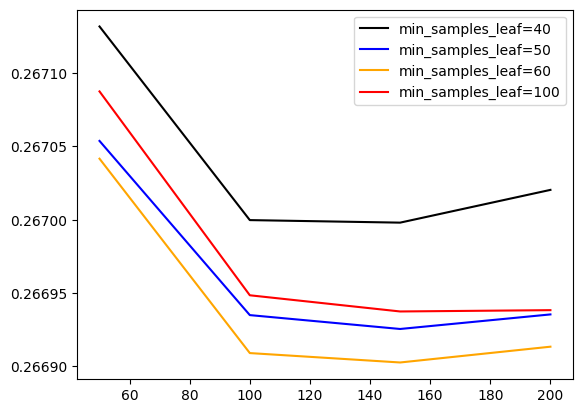

In [35]:
# Visualize for better understanding
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [40, 50, 60, 100]
 
for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
     
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             color=col,
             label='min_samples_leaf=%d' % s)
 
plt.legend()

In [36]:
# Also min_samples_leaf = 60 in n = 100 looks great
min_samples_leaf = 60

In [37]:
scores = []
for n in tqdm([50, 100, 150, 200]):
    rf = RandomForestRegressor(n_estimators=n, max_depth=5, min_samples_leaf=min_samples_leaf, random_state=1, n_jobs=-1)
    rf.fit(X_train,y_train)
        
    y_pred = rf.predict(X_val)
    result = rmse(y_val, y_pred)
    scores.append((result))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:45<00:00, 11.38s/it]


In [38]:
scores

[np.float64(0.2670416490888927),
 np.float64(0.26690912050218313),
 np.float64(0.2669027122533806),
 np.float64(0.2669134722562102)]

<h4>Because of the small difference the 50 would be okay</h4>

In [40]:
n_estimators = 50

In [116]:
# Final Random Forest with tunned parameters
rf = RandomForestRegressor(n_estimators=50, max_depth=5, min_samples_leaf=60, random_state=1, n_jobs=-1)
rf.fit(X_train,y_train)

,n_estimators,50
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,60
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<h3>Traning the XGBoost model</h3>

In [101]:
# Get the features names
features = list(dv.get_feature_names_out())

In [102]:
# Making the Dmatrixes
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
watchlist = [(dtrain, 'train'), (dval, 'val')]

<h4>Parameter tunning</h4>

In [103]:
# Finding the best 'eta' for our data
scores = {} 
etas = [0.01, 0.05, 0.1, 0.3, 1.0] 
for eta in etas:
    evals_result = {}

    xgb_params = {
        'eta': eta,
        'max_depth': 6,
        'min_child_weight': 1,
        'objective': 'reg:squarederror',  # regression
        'eval_metric': 'rmse',            # regression metric
        'nthread': 8,
        'seed': 1,
        'verbosity': 1
    }

    model = xgb.train(
        xgb_params,
        dtrain,
        evals=watchlist,
        verbose_eval=0,
        num_boost_round=200,
        evals_result=evals_result
    )

    columns = ['iter', 'train_rmse', 'val_rmse']
    train_rmse = list(evals_result['train'].values())[0]
    val_rmse = list(evals_result['val'].values())[0]

    df_results = pd.DataFrame(
        list(zip(range(1, len(train_rmse) + 1), train_rmse, val_rmse)),
        columns=columns
    )

    key = f'eta={eta}'
    scores[key] = df_results

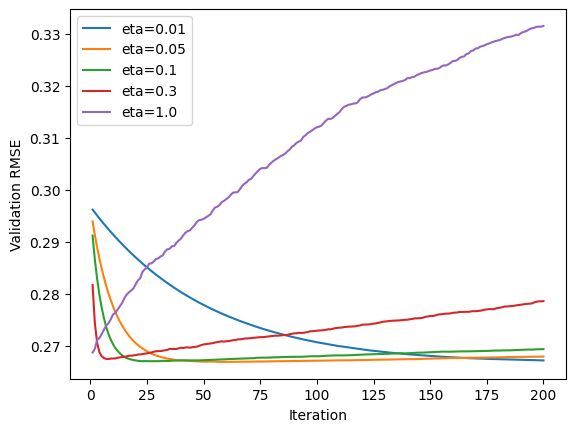

In [104]:
for eta in scores.keys():
    df_results = scores[eta]
    plt.plot(df_results.iter, df_results.val_rmse, label=eta)
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Validation RMSE')
plt.show()

In [105]:
scores = {} 
max_depths = [1, 2, 6, 3, 4, 10]

for max_depth in max_depths:
    evals_result = {}

    xgb_params = {
        'eta': 0.05,
        'max_depth': max_depth,
        'min_child_weight': 1,
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',        
        'nthread': 8,
        'seed': 1,
        'verbosity': 1
    }

    model = xgb.train(
        xgb_params,
        dtrain,
        evals=watchlist,
        verbose_eval=0,
        num_boost_round=200,
        evals_result=evals_result
    )

    columns = ['iter', 'train_rmse', 'val_rmse']
    train_rmse = list(evals_result['train'].values())[0]
    val_rmse = list(evals_result['val'].values())[0]

    df_results = pd.DataFrame(
        list(zip(range(1, len(train_rmse) + 1), train_rmse, val_rmse)),
        columns=columns
    )

    key = f'max_depth={max_depth}'
    scores[key] = df_results

In [106]:
df_results

,iter,train_rmse,val_rmse
0,1,0.293545,0.293966
1,2,0.289810,0.291421
2,3,0.286377,0.289133
3,4,0.283263,0.287035
4,5,0.280240,0.285161
...,...,...,...
195,196,0.222306,0.270718
196,197,0.222212,0.270720
197,198,0.222135,0.270720
198,199,0.222048,0.270746


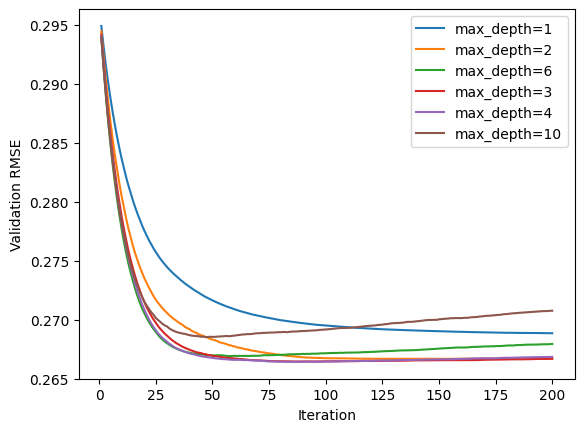

In [107]:
for max_depth in scores.keys():
    df_results = scores[max_depth]
    plt.plot(df_results.iter, df_results.val_rmse, label=max_depth)
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Validation RMSE')
plt.show()

In [111]:
scores = {} 
min_child_weights = [1, 10, 50, 100, 200]

for min_child_weight in min_child_weights:
    evals_result = {}

    xgb_params = {
        'eta': 0.01,
        'max_depth': 3,
        'min_child_weight': min_child_weight,
        'objective': 'reg:squarederror',  
        'eval_metric': 'rmse',            
        'nthread': 8,
        'seed': 1,
        'verbosity': 1
    }

    model = xgb.train(
        xgb_params,
        dtrain,
        evals=watchlist,  
        verbose_eval=0,
        num_boost_round=200,
        evals_result=evals_result
    )

    train_rmse = list(evals_result['train'].values())[0]
    val_rmse = list(evals_result['val'].values())[0]

    df_results = pd.DataFrame(
        list(zip(range(1, len(train_rmse) + 1), train_rmse, val_rmse)),
        columns=['iter', 'train_rmse', 'val_rmse']
    )

    key = f'min_child_weight={min_child_weight}'
    scores[key] = df_results

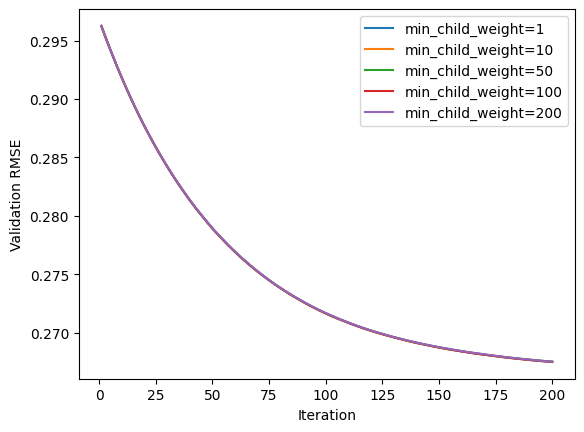

In [113]:
for min_child_weight in scores.keys():
    df_results = scores[min_child_weight]
    plt.plot(df_results.iter, df_results.val_rmse, label=min_child_weight)
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Validation RMSE')
plt.show()

<p>I have test it many times and I always get the same answer which is changing the 'min_child_weight' doesn't affect the accuracy</p>

<p>So I decided to set it '1'</p>

In [ ]:
# Final XGBoost model with tunned parameters
xgb_params = {
        'eta': 0.01,
        'max_depth': 3,
        'min_child_weight': 1,
        'objective': 'reg:squarederror',  
        'eval_metric': 'rmse',            
        'nthread': 8,
        'seed': 1,
        'verbosity': 1
    }

model = xgb.train(
        xgb_params,
        dtrain,
        evals=watchlist,  
        verbose_eval=0,
        num_boost_round=200,
        evals_result=evals_result
    )

<h3>Selecting the best model</h3>

<h4>Random forest model</h4>

In [117]:
# Final Random Forest with tunned parameters
rf = RandomForestRegressor(n_estimators=50, max_depth=5, min_samples_leaf=60, random_state=1, n_jobs=-1)
rf.fit(X_train,y_train)

,n_estimators,50
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,60
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<h4>Random forest model test</h4>

In [118]:
y_pred = rf.predict(X_val)
rmse(y_pred, y_val)

np.float64(0.2670416490888927)

In [120]:
xgb_params = {
        'eta': 0.01,
        'max_depth': 3,
        'min_child_weight': 1,
        'objective': 'reg:squarederror',  
        'nthread': 8,
        'seed': 1,
        'verbosity': 0
    }

model = xgb.train(
        xgb_params,
        dtrain,
        evals=watchlist,  
        num_boost_round=200,
    )

[0]	train-rmse:0.29701	val-rmse:0.29625
[1]	train-rmse:0.29647	val-rmse:0.29572
[2]	train-rmse:0.29593	val-rmse:0.29521
[3]	train-rmse:0.29540	val-rmse:0.29470
[4]	train-rmse:0.29489	val-rmse:0.29420
[5]	train-rmse:0.29438	val-rmse:0.29371
[6]	train-rmse:0.29387	val-rmse:0.29322
[7]	train-rmse:0.29338	val-rmse:0.29275
[8]	train-rmse:0.29289	val-rmse:0.29229
[9]	train-rmse:0.29241	val-rmse:0.29182
[10]	train-rmse:0.29194	val-rmse:0.29137
[11]	train-rmse:0.29149	val-rmse:0.29094
[12]	train-rmse:0.29103	val-rmse:0.29050
[13]	train-rmse:0.29059	val-rmse:0.29007
[14]	train-rmse:0.29015	val-rmse:0.28966
[15]	train-rmse:0.28973	val-rmse:0.28925
[16]	train-rmse:0.28931	val-rmse:0.28885
[17]	train-rmse:0.28889	val-rmse:0.28845
[18]	train-rmse:0.28849	val-rmse:0.28806
[19]	train-rmse:0.28809	val-rmse:0.28768
[20]	train-rmse:0.28770	val-rmse:0.28731
[21]	train-rmse:0.28731	val-rmse:0.28694
[22]	train-rmse:0.28694	val-rmse:0.28658
[23]	train-rmse:0.28657	val-rmse:0.28623
[24]	train-rmse:0.28620	va